## Introduction to Pandas





Before we jump into Pandas, let us review what we have considered so far.

First, we learned how to read data from files into numpy arrays. We learned how to use variables to store that data, and to either slice the array into a few variables, or use slices themselves for something. We also learned how to make a *record* array that enabled us to access columns of the array by a *name*.

When we loaded a json file, we got a *dictionary* data structure, which also allowed us to access data by a *name*.

Second, we imported a visualization library, and made plots that used the arrays as arguments.

For "small" data sets, i.e. not too many columns, this is a perfectly reasonable thing to do. For larger datasets, however, it can be tedious to create a lot of variable names, and it is also hard to remember what is in each column.

Many tasks are pretty standard, e.g. read a data set, summarize and visualize it. It would be nice if we had a simple way to do this, with few lines of code, since those lines will be the same every time.

The [Pandas](https://pandas.pydata.org/) library was developed to address all these issues. From the website: "**pandas** is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language."





### Review of the numpy array way





Let's review what we learned already.





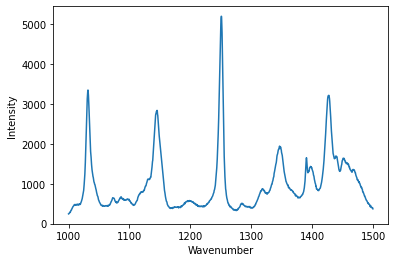

In [1]:
import numpy as np
data = np.loadtxt('raman.txt')

wavenumber, intensity = data.T  # the transpose has data in rows for unpacking
ind = (wavenumber >= 1000) & (wavenumber < 1500)

import matplotlib.pyplot as plt
plt.figure()
plt.plot(wavenumber[ind], intensity[ind])
plt.xlabel('Wavenumber')
plt.ylabel('Intensity');



In [7]:
data

array([[ 500.      ,  294.37869 ],
       [ 500.39374 ,  288.922   ],
       [ 500.78751 ,  286.06622 ],
       ...,
       [3499.2124  ,   87.969734],
       [3499.6062  ,   83.638931],
       [3500.      ,   84.009064]])

### Now, with Pandas





We will unpack this code shortly. For now, look how short it is to create this plot. Note that we have condensed all the code in the example above basically into three lines of code. That is pretty remarkable, but should give you some pause. We now have to learn how to use such a dense syntax!





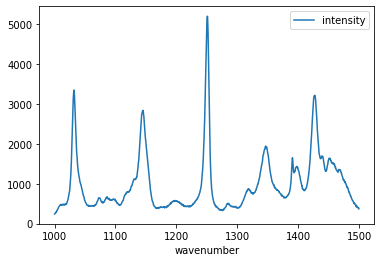

In [15]:
import pandas as pd

df = pd.read_csv('raman.txt', delimiter = '\t', index_col=0,
                 names=['wavenumber', 'intensity'])
ind = (df.index >= 1000) & (df.index<1500)
df[ind].plot();



In [16]:
df

,intensity
wavenumber,
500.00000,294.378690
500.39374,288.922000
500.78751,286.066220
501.18124,275.222840
501.57501,275.119380
...,...
3498.42500,86.151878
3498.81880,85.178947
3499.21240,87.969734


And to summarize.





In [17]:
df.describe()



,intensity
count,7620.000000
mean,558.388392
std,982.659031
min,77.104279
25%,113.666535
50%,219.409340
75%,552.632848
max,15275.059000


What is the benefit of this dense syntax? Because it is so short, it is faster to type (at least, when you know what to type). That means it is also faster for you to read.

The downside is that it is like learning a whole new language within Python, and a new mental model for how the data is stored and accessed. You have to decide if it is worthwhile doing that. If you do this a lot, it is probably worthwhile.





## Pandas





The main object we will work with is called a `DataFrame`.





In [21]:
type(df)



pandas.core.frame.DataFrame

In [31]:
df['2*intensity'] = df['intensity'] * 2
df

,intensity,2*intensity
wavenumber,,
500.00000,294.378690,588.757380
500.39374,288.922000,577.844000
500.78751,286.066220,572.132440
501.18124,275.222840,550.445680
501.57501,275.119380,550.238760
...,...,...
3498.42500,86.151878,172.303756
3498.81880,85.178947,170.357894
3499.21240,87.969734,175.939468


In [32]:
df['2*intensity']

wavenumber
500.00000     588.757380
500.39374     577.844000
500.78751     572.132440
501.18124     550.445680
501.57501     550.238760
                 ...    
3498.42500    172.303756
3498.81880    170.357894
3499.21240    175.939468
3499.60620    167.277862
3500.00000    168.018128
Name: 2*intensity, Length: 7620, dtype: float64

Jupyter notebooks can show you a fancy rendering of your dataframe.





The dataframe combines a few ideas we used from arrays and dictionaries. First, we can access a column by name. When we do this, we get a `Series` object.





In [42]:
type(df['intensity'])



pandas.core.series.Series

You can extract the values into a numpy array like this.





In [44]:
df['intensity'].values, df.values



(array([294.37869 , 288.922   , 286.06622 , ...,  87.969734,  83.638931,
         84.009064]),
 array([[294.37869 , 588.75738 ],
        [288.922   , 577.844   ],
        [286.06622 , 572.13244 ],
        ...,
        [ 87.969734, 175.939468],
        [ 83.638931, 167.277862],
        [ 84.009064, 168.018128]]))

A Series (and DataFrame) are like numpy arrays in some ways, and different in others. Suppose we want to see the first five entries of the intensity. If we want to use *integer-based* indexing like we have so far, you have to use the `iloc` attribute on the series like this. `iloc` is for integer location.





In [45]:
df[0]


KeyError: 0

In [47]:
df.head()

,intensity,2*intensity
wavenumber,,
500.00000,294.37869,588.75738
500.39374,288.92200,577.84400
500.78751,286.06622,572.13244
501.18124,275.22284,550.44568
501.57501,275.11938,550.23876


In [48]:
df.tail()

,intensity,2*intensity
wavenumber,,
3498.4250,86.151878,172.303756
3498.8188,85.178947,170.357894
3499.2124,87.969734,175.939468
3499.6062,83.638931,167.277862
3500.0000,84.009064,168.018128


In [46]:
df.iloc[0]

intensity      294.37869
2*intensity    588.75738
Name: 500.0, dtype: float64

In [49]:
df['intensity'].iloc[0]



294.37869

What about the wavenumbers? These are called the *index* of the dataframe.





In [50]:
df.index



Float64Index([    500.0, 500.39374, 500.78751, 501.18124, 501.57501, 501.96875,
              502.36252, 502.75626, 503.15002, 503.54376,
              ...
              3496.4563, 3496.8501, 3497.2437, 3497.6375, 3498.0313,  3498.425,
              3498.8188, 3499.2124, 3499.6062,    3500.0],
             dtype='float64', name='wavenumber', length=7620)

You can index the index with integers as you can with an array.





In [51]:
df.index[0:5]



Float64Index([500.0, 500.39374, 500.78751, 501.18124, 501.57501], dtype='float64', name='wavenumber')

Finally, you can combine these so that you index a column with a slice of the index like this.





In [62]:
0.1 + 0.2 == 0.3

False

In [ ]:
df[500.0]

In [60]:
df.loc[500.39374]

intensity      288.922
2*intensity    577.844
Name: 500.39374, dtype: float64

In [58]:
df['intensity'][df.index[0:5]]



wavenumber
500.00000    294.37869
500.39374    288.92200
500.78751    286.06622
501.18124    275.22284
501.57501    275.11938
Name: intensity, dtype: float64

In summary, we can think of a dataframe as a hybrid array/dictionary where we have an index which is like the independent variable, and a set of columns that are like dependent variables. You can access the columns like a dictionary.





### Dataframes and visualization





Dataframes also provide easy access to [visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html). The simplest method is to just call the plot method on a dataframe. Note this automatically makes the plot with labels and a legend. If there are many columns, you will have a curve for each one of them. We will see that later.





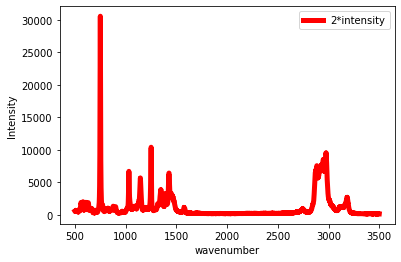

In [67]:
df.plot(y='2*intensity', ylabel='Intensity', color='red', 
        linewidth=5);



In [69]:
df['4*intensity'] = df['intensity']
df['4*intensity'] *= 4
df

,intensity,2*intensity,4*intensity
wavenumber,,,
500.00000,294.378690,588.757380,1177.514760
500.39374,288.922000,577.844000,1155.688000
500.78751,286.066220,572.132440,1144.264880
501.18124,275.222840,550.445680,1100.891360
501.57501,275.119380,550.238760,1100.477520
...,...,...,...
3498.42500,86.151878,172.303756,344.607512
3498.81880,85.178947,170.357894,340.715788
3499.21240,87.969734,175.939468,351.878936


### Reading data in Pandas





Let's get back to how we got the data into Pandas. Let's retrieve the data file we used before with several columns in it.





In [70]:
fname = 'p-t.dat'
url = 'https://www.itl.nist.gov/div898/handbook/datasets/MODEL-4_4_4.DAT'

import urllib.request
urllib.request.urlretrieve(url, fname)



URLError: <urlopen error [Errno -3] Temporary failure in name resolution>

Let's refresh our memory of what is in this file:





In [71]:
! head p-t.dat



 Run          Ambient                            Fitted
Order  Day  Temperature  Temperature  Pressure    Value    Residual
 1      1      23.820      54.749      225.066   222.920     2.146
 2      1      24.120      23.323      100.331    99.411     0.920
 3      1      23.434      58.775      230.863   238.744    -7.881
 4      1      23.993      25.854      106.160   109.359    -3.199
 5      1      23.375      68.297      277.502   276.165     1.336
 6      1      23.233      37.481      148.314   155.056    -6.741
 7      1      24.162      49.542      197.562   202.456    -4.895
 8      1      23.667      34.101      138.537   141.770    -3.232


We use [Pandas.read\_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) to read this, similar to how we used `numpy.loadtxt`. It also takes a lot of arguments to fine-tune the output. We use spaces as the delimiter here. `'\s+'` is a *regular expression* for multiple spaces. We still skip two rows, and we have to manually define the column names. We *do not* specify an index column here, we get a default one based on integers. Pandas is smart enough to recognize the first two columns are integers, so we do not have to do anything special here.





In [72]:
df = pd.read_csv('p-t.dat', delimiter='\s+', skiprows=2,
                 names=['Run order', 'Day', 'Ambient Temperature', 'Temperature',
                        'Pressure', 'Fitted Value', 'Residual'])
df



,Run order,Day,Ambient Temperature,Temperature,Pressure,Fitted Value,Residual
0,1,1,23.820,54.749,225.066,222.920,2.146
1,2,1,24.120,23.323,100.331,99.411,0.920
2,3,1,23.434,58.775,230.863,238.744,-7.881
3,4,1,23.993,25.854,106.160,109.359,-3.199
4,5,1,23.375,68.297,277.502,276.165,1.336
5,6,1,23.233,37.481,148.314,155.056,-6.741
6,7,1,24.162,49.542,197.562,202.456,-4.895
7,8,1,23.667,34.101,138.537,141.770,-3.232
8,9,1,24.056,33.901,137.969,140.983,-3.014
9,10,1,22.786,29.242,117.410,122.674,-5.263


The default plot is not that nice.





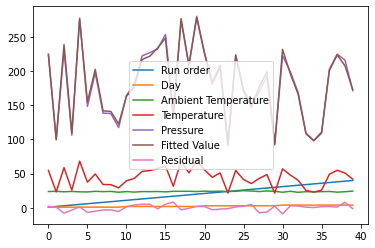

In [73]:
df.plot();



The default is to plot each column vs the index, which is not that helpful for us. Say we just want to plot the pressure vs. the temperature.





matplotlib.axes._subplots.AxesSubplot

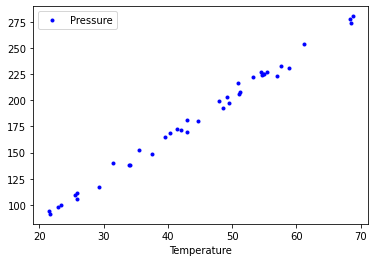

In [75]:
p = df.plot(x='Temperature', y='Pressure', style='b.');
type(p)


We can add multiple plots to a figure, but we have to tell the subsequent calls which axes to put them on. To do that, save the first one, and pass it as an argument in subsequent plots.  That also allows you to fine-tune the plot appearance, e.g. add a y-label. See the [matplotlib documentation](https://matplotlib.org/contents.html) to learn how to set all of these.





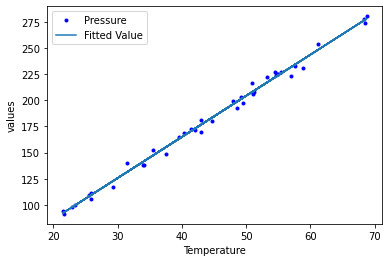

Signature: p1.set_ylabel(ylabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)
Docstring:
Set the label for the y-axis.

Parameters
----------
ylabel : str
    The label text.

labelpad : float, default: :rc:`axes.labelpad`
    Spacing in points from the Axes bounding box including ticks
    and tick labels.  If None, the previous value is left as is.

loc : {'bottom', 'center', 'top'}, default: :rc:`yaxis.labellocation`
    The label position. This is a high-level alternative for passing
    parameters *y* and *horizontalalignment*.

Other Parameters
----------------
**kwargs : `.Text` properties
    `.Text` properties control the appearance of the label.

See Also
--------
text : Documents the properties supported by `.Text`.
File:      /opt/tljh/user/lib/python3.9/site-packages/matplotlib/axes/_base.py
Type:      method


In [80]:
p1 = df.plot(x='Temperature', y='Pressure', style='b.')
df.plot(x='Temperature', y='Fitted Value', ax=p1)

p1.set_ylabel('values');
?p1.set_ylabel

It is a reasonable question to ask if this is simpler than what we did before using arrays, variables and plotting commands. Dataframes are increasingly common in data science, and are the data structure used in many data science/machine learning projects.





## Another real-life example





LAMMPS is a molecular simulation code used to run molecular dynamics. It outputs a text file that is somewhat challenging to read. There are variable numbers of time steps that depend on how the simulation was setup.

Start by downloading and opening this file. It is a molecular dynamics trajectory at constant volume, where the pressure, temperature and energy fluctuate.

Open this file [log1.lammps](./log1.lammps) to get a sense for what is in it. The data starts around:

    timestep 0.005
    run ${runSteps}
    run 500000
    Per MPI rank memory allocation (min/avg/max) = 4.427 | 4.427 | 4.427 Mbytes
    Step v_mytime Temp Press Volume PotEng TotEng v_pxy v_pxz v_pyz v_v11 v_v22 v_v33 CPU
           0            0         1025    601.28429    8894.6478   -1566.6216   -1500.5083    2065.6285    1713.4095    203.00499 1.3408976e-05 9.2260011e-06 1.2951038e-07            0 w

And it ends around this line.

      500000         2500    978.62359   -2100.7614    8894.6478   -1570.5382   -1507.4162   -252.80665    614.87398    939.65393 0.00045263648 0.00043970796 0.00044228719    1288.0233
    Loop time of 1288.02 on 1 procs for 500000 steps with 500 atoms

Our job is to figure out where those lines are so we can read them into Pandas. There are many ways to do this, but we will stick with a pure Python way. The strategy is to search for the lines, and keep track of their positions.





In [81]:
start, stop = None, None
with open('log1.lammps') as f:
    for i, line in enumerate(f):
        if line.startswith('Step v_mytime'):
            start = i
        if line.startswith('Loop time of '):
            stop = i - 1  # stop on the previous line
            break
start, stop



(69, 2570)

This gets tricky. We want to skip the rows up to the starting line. At that point, the line numbers restart as far as Pandas is concerned, so the header is in line 0 then, and the number of rows to read is defined by the stop line minus the start line. The values are separated by multiple spaces, so we use a *pattern* to indicate multiple spaces. Finally, we prevent the first column from being the index column by setting index\_col to be False. See [https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html>](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html>)for all the details.





In [82]:
df = pd.read_csv('log1.lammps', skiprows=start, header=0, nrows=stop - start, delimiter='\s+', index_col=False)
df



<ipython-input-82-842e761e5508>:1: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv('log1.lammps', skiprows=start, header=0, nrows=stop - start, delimiter='\s+', index_col=False)


,Step,v_mytime,Temp,Press,Volume,PotEng,TotEng,v_pxy,v_pxz,v_pyz,v_v11,v_v22,v_v33,CPU
0,0,0,1025.00000,601.28429,8894.6478,-1566.6216,-1500.5083,2065.62850,1713.409500,203.00499,0.000013,0.000009,1.295104e-07,0.000000
1,200,1,1045.85100,-1974.43580,8894.6478,-1569.6934,-1502.2352,2530.16720,-2203.376800,-2193.88770,0.000423,-0.000564,9.109558e-04,0.505391
2,400,2,1050.44480,2974.54030,8894.6478,-1564.3755,-1496.6210,1446.73930,637.829780,1794.70610,0.001115,0.000125,4.583668e-04,1.018666
3,600,3,1071.37780,2386.37510,8894.6478,-1566.4325,-1497.3278,599.73943,-462.748090,558.54192,0.000766,0.000387,3.082071e-04,1.532061
4,800,4,1055.52810,-661.78795,8894.6478,-1569.3172,-1501.2348,1775.43870,-1551.263500,-493.01032,0.000569,0.000380,2.913082e-04,2.051839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2496,499200,2496,977.95894,-1747.91220,8894.6478,-1570.0162,-1506.9370,1411.85600,1154.883400,-2265.50500,0.000452,0.000440,4.424962e-04,1285.960300
2497,499400,2497,1066.50870,-77.15260,8894.6478,-1568.3816,-1499.5910,4071.88400,3847.295900,-1279.02860,0.000452,0.000440,4.428113e-04,1286.474100
2498,499600,2498,1052.18860,1958.97410,8894.6478,-1565.8013,-1497.9343,-2152.54460,925.775780,-1162.76120,0.000453,0.000439,4.427215e-04,1286.987000
2499,499800,2499,1057.30140,-1709.95670,8894.6478,-1570.6800,-1502.4832,-1530.34090,-71.479217,731.44735,0.000453,0.000440,4.423706e-04,1287.503200


### Visualizing the data





#### Plot a column





The effort was worth it though; look how easy it is to plot the data!





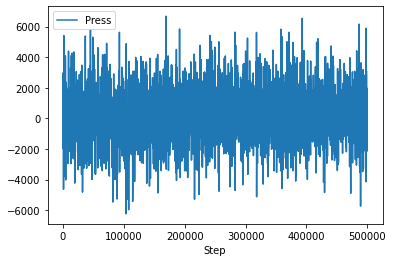

In [83]:
df.plot(x='Step', y='Press');



In [85]:
df['Press'].mean()

188.03530393512196

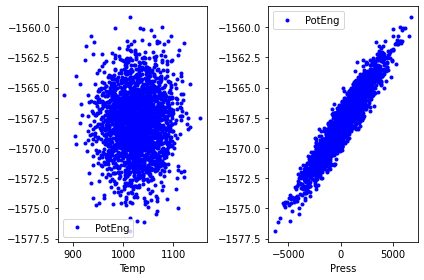

In [86]:
import matplotlib.pyplot as plt
fig, (ax0, ax1) = plt.subplots(1, 2)
df.plot(x='Temp', y='PotEng', style='b.', ax=ax0)
df.plot(x='Press', y='PotEng', style='b.', ax=ax1)
plt.tight_layout()



#### Plot distributions of a column





We can look at histograms of properties as easily.





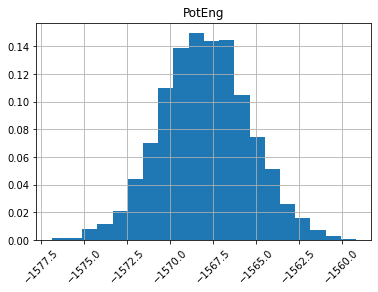

In [87]:
df.hist('PotEng', xrot=45, bins=20, density=True);



#### Plot column correlations





This is just the beginning of using Pandas. Suppose we want to see which columns are correlated ([https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)). With variables this would be tedious.





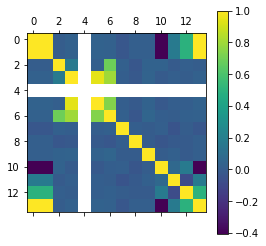

In [89]:
plt.matshow(df.corr())
plt.colorbar()



We can see these correlations with a pairplot. This is moderately expensive to plot (it could take a few minutes).



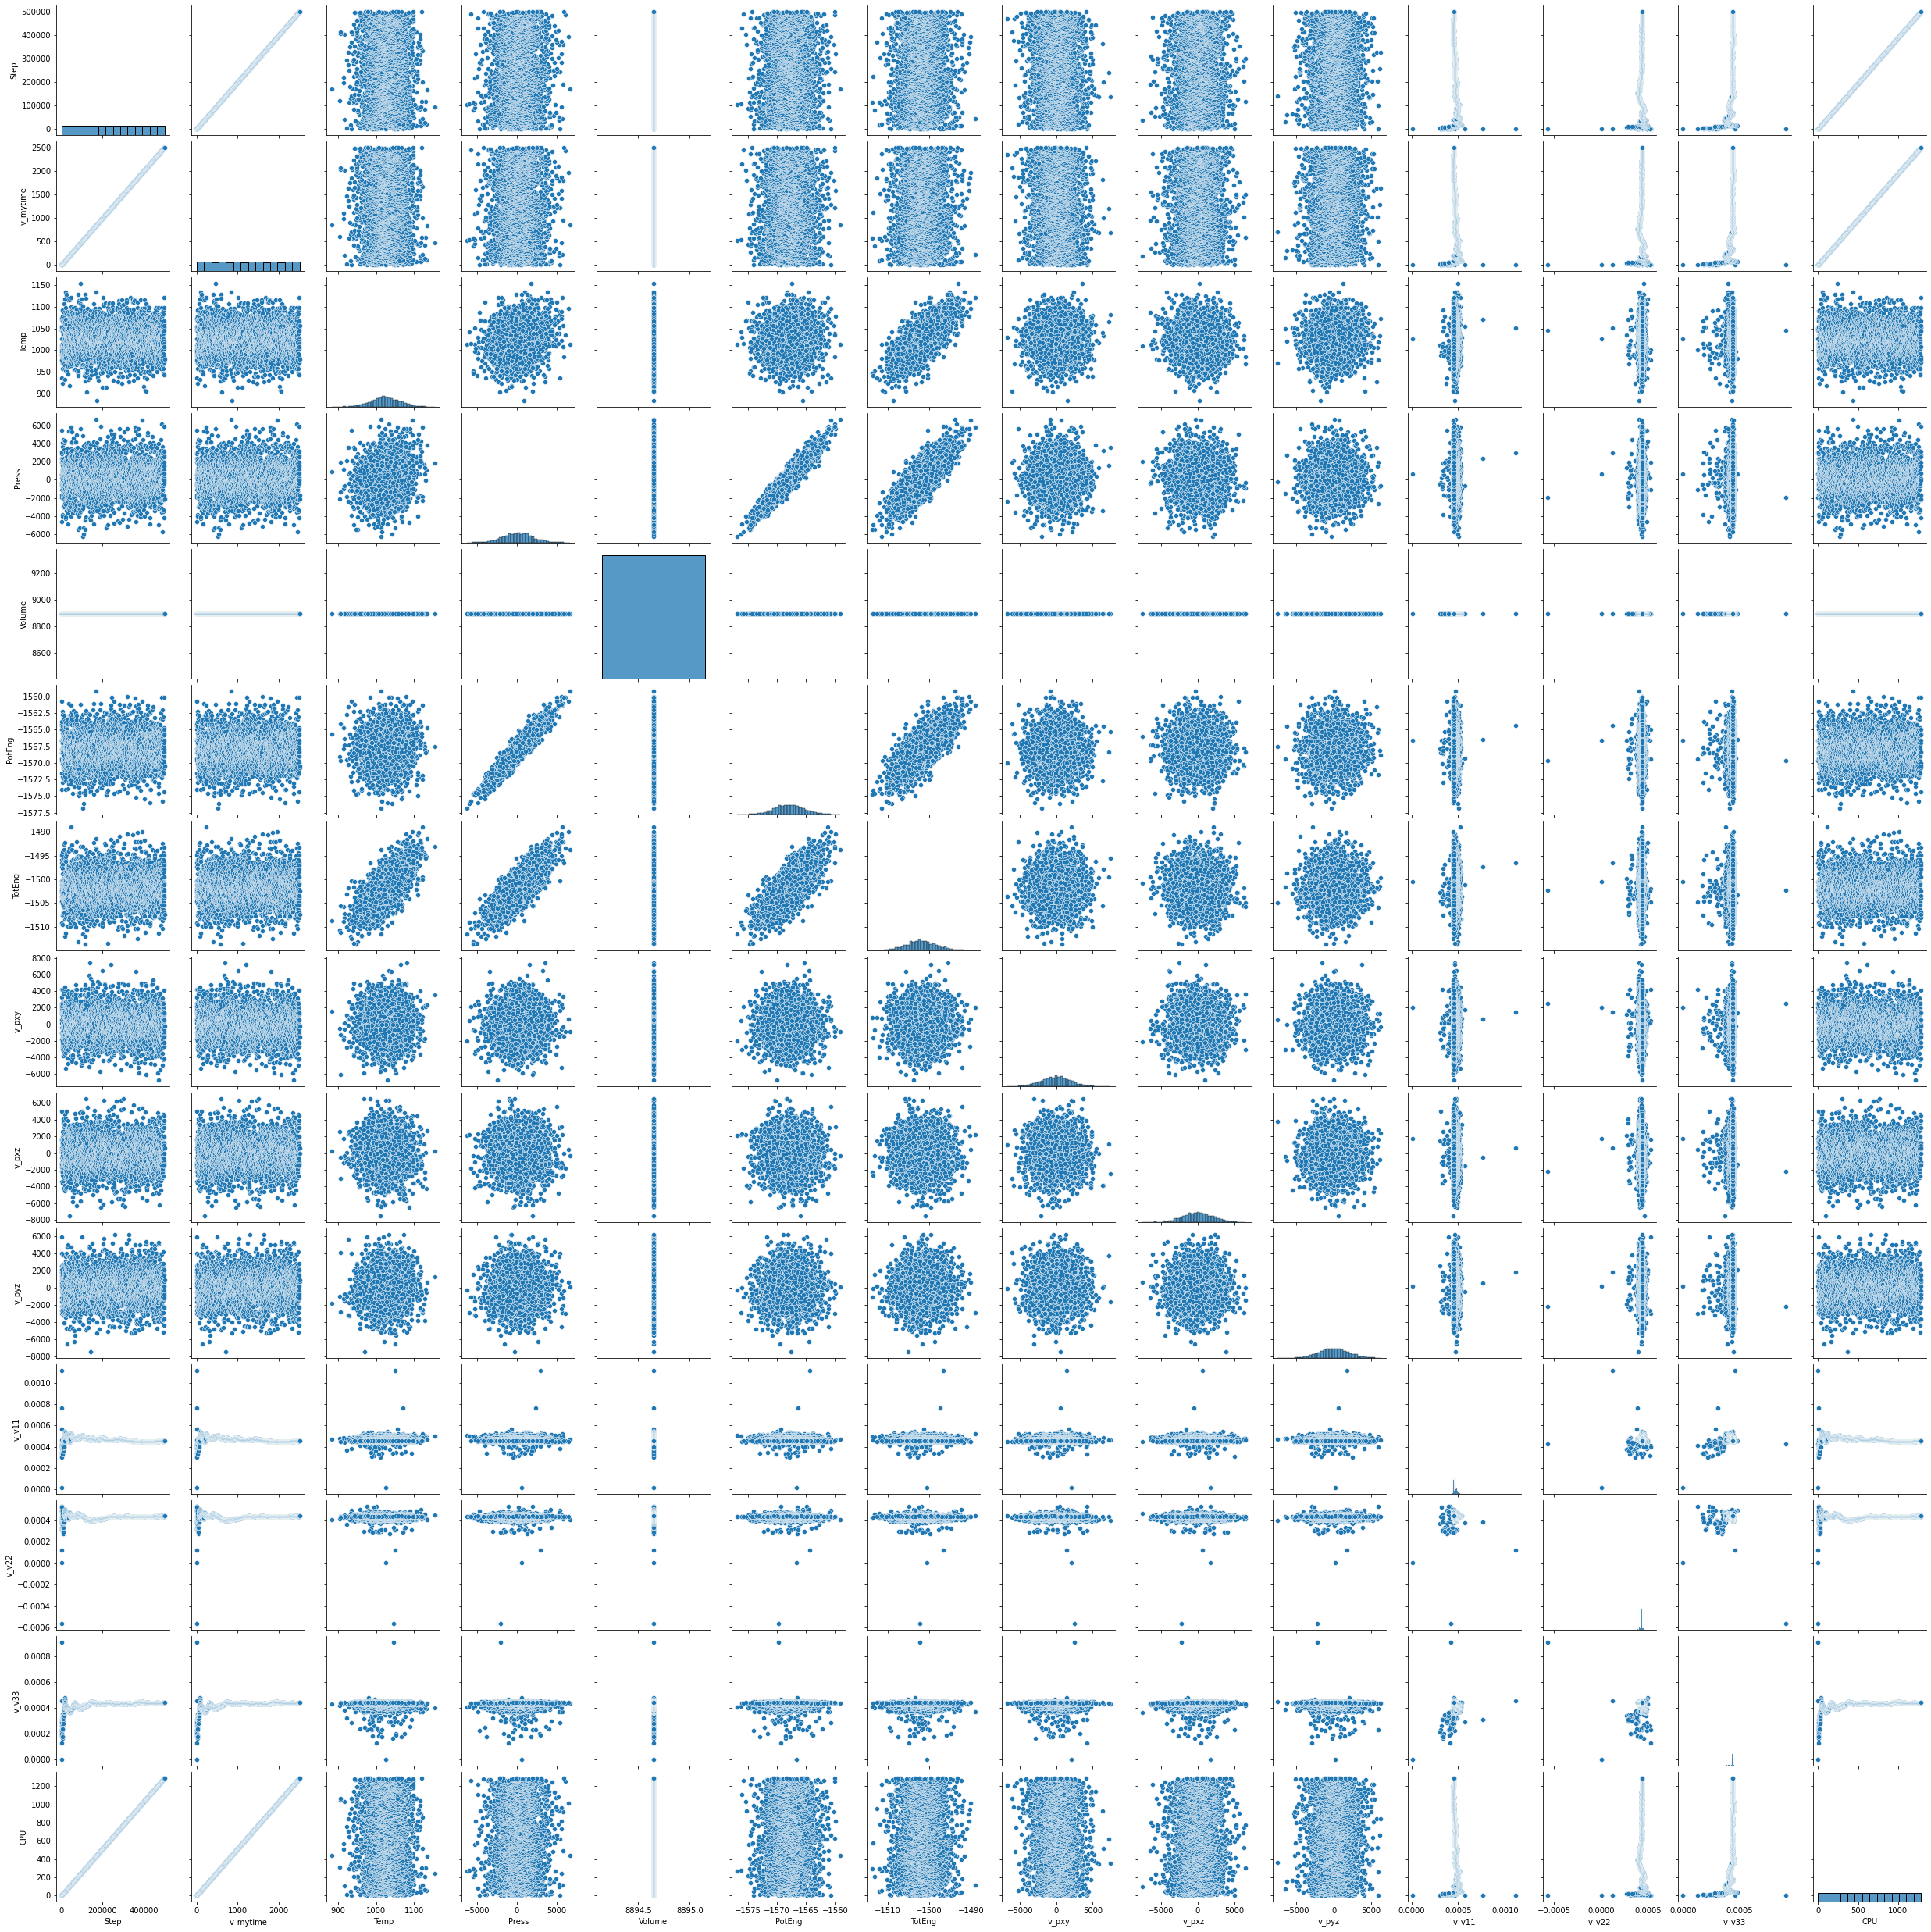

In [90]:
import seaborn as sns
sns.pairplot(df);



You can also make the figure manually. Note, it is not possible to plot a column against itself with Pandas (I think this is a bug [https://github.com/pandas-dev/pandas/issues/22088](https://github.com/pandas-dev/pandas/issues/22088)), so here I use matplotlib functions for the plotting. This should be symmetric, so I only plot the upper triangle.





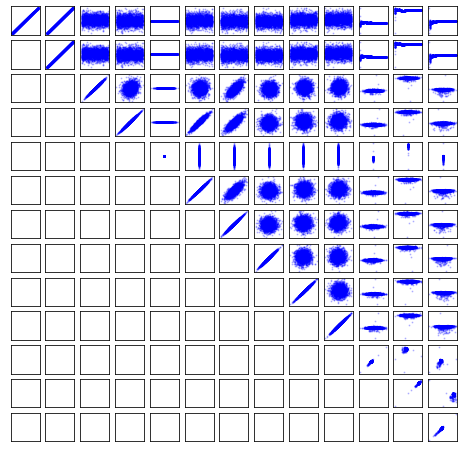

In [92]:
keys = df.keys()

fig, axs = plt.subplots(13, 13)
fig.set_size_inches((8, 8))
for i in range(13):
    for j in range(i, 13):
        axs[i, j].plot(df[keys[i]], df[keys[j]], 'b.', ms=2, alpha=0.2)
        # remove axes so it is easier to read
        axs[i, j].axes.get_xaxis().set_visible(False)
        axs[i, j].axes.get_yaxis().set_visible(False)
        axs[j, i].axes.get_xaxis().set_visible(False)
        axs[j, i].axes.get_yaxis().set_visible(False);



### Getting parts of a Pandas DataFrame





We have seen how to get a column from a DataFrame like this:





In [93]:
df['Press']



0        601.28429
1      -1974.43580
2       2974.54030
3       2386.37510
4       -661.78795
           ...    
2496   -1747.91220
2497     -77.15260
2498    1958.97410
2499   -1709.95670
2500   -2100.76140
Name: Press, Length: 2501, dtype: float64

In this context, the DataFrame is acting like a dictionary. You can get a few columns by using a list of column names.





In [94]:
df[['Press', 'PotEng']]



,Press,PotEng
0,601.28429,-1566.6216
1,-1974.43580,-1569.6934
2,2974.54030,-1564.3755
3,2386.37510,-1566.4325
4,-661.78795,-1569.3172
...,...,...
2496,-1747.91220,-1570.0162
2497,-77.15260,-1568.3816
2498,1958.97410,-1565.8013
2499,-1709.95670,-1570.6800


What about a row? This is what we would have done with a numpy array, but it just doesn't work here.





In [95]:
df[0]



KeyError: 0

The problem is that as a dictionary, the keys are for the *columns*.





In [96]:
df.keys()



Index(['Step', 'v_mytime', 'Temp', 'Press', 'Volume', 'PotEng', 'TotEng',
       'v_pxy', 'v_pxz', 'v_pyz', 'v_v11', 'v_v22', 'v_v33', 'CPU'],
      dtype='object')

One way to get the rows by their integer index is to use the *integer location* attribute for a row.





In [97]:
df.iloc[0]



Step        0.000000e+00
v_mytime    0.000000e+00
Temp        1.025000e+03
Press       6.012843e+02
Volume      8.894648e+03
PotEng     -1.566622e+03
TotEng     -1.500508e+03
v_pxy       2.065628e+03
v_pxz       1.713409e+03
v_pyz       2.030050e+02
v_v11       1.340898e-05
v_v22       9.226001e-06
v_v33       1.295104e-07
CPU         0.000000e+00
Name: 0, dtype: float64

We can use slices on this.





In [98]:
df.iloc[0:5]



,Step,v_mytime,Temp,Press,Volume,PotEng,TotEng,v_pxy,v_pxz,v_pyz,v_v11,v_v22,v_v33,CPU
0,0,0,1025.0000,601.28429,8894.6478,-1566.6216,-1500.5083,2065.62850,1713.40950,203.00499,0.000013,0.000009,1.295104e-07,0.000000
1,200,1,1045.8510,-1974.43580,8894.6478,-1569.6934,-1502.2352,2530.16720,-2203.37680,-2193.88770,0.000423,-0.000564,9.109558e-04,0.505391
2,400,2,1050.4448,2974.54030,8894.6478,-1564.3755,-1496.6210,1446.73930,637.82978,1794.70610,0.001115,0.000125,4.583668e-04,1.018666
3,600,3,1071.3778,2386.37510,8894.6478,-1566.4325,-1497.3278,599.73943,-462.74809,558.54192,0.000766,0.000387,3.082071e-04,1.532061
4,800,4,1055.5281,-661.78795,8894.6478,-1569.3172,-1501.2348,1775.43870,-1551.26350,-493.01032,0.000569,0.000380,2.913082e-04,2.051839


This example may be a little confusing, because our index does include 0, so we can in this case also use the row label with the *location* attribute. You can use any value in the index for this.





In [ ]:
df.index



In [99]:
df.loc[0]



Step        0.000000e+00
v_mytime    0.000000e+00
Temp        1.025000e+03
Press       6.012843e+02
Volume      8.894648e+03
PotEng     -1.566622e+03
TotEng     -1.500508e+03
v_pxy       2.065628e+03
v_pxz       1.713409e+03
v_pyz       2.030050e+02
v_v11       1.340898e-05
v_v22       9.226001e-06
v_v33       1.295104e-07
CPU         0.000000e+00
Name: 0, dtype: float64

We can access the first five rows like this.





In [100]:
df.loc[0:4]



,Step,v_mytime,Temp,Press,Volume,PotEng,TotEng,v_pxy,v_pxz,v_pyz,v_v11,v_v22,v_v33,CPU
0,0,0,1025.0000,601.28429,8894.6478,-1566.6216,-1500.5083,2065.62850,1713.40950,203.00499,0.000013,0.000009,1.295104e-07,0.000000
1,200,1,1045.8510,-1974.43580,8894.6478,-1569.6934,-1502.2352,2530.16720,-2203.37680,-2193.88770,0.000423,-0.000564,9.109558e-04,0.505391
2,400,2,1050.4448,2974.54030,8894.6478,-1564.3755,-1496.6210,1446.73930,637.82978,1794.70610,0.001115,0.000125,4.583668e-04,1.018666
3,600,3,1071.3778,2386.37510,8894.6478,-1566.4325,-1497.3278,599.73943,-462.74809,558.54192,0.000766,0.000387,3.082071e-04,1.532061
4,800,4,1055.5281,-661.78795,8894.6478,-1569.3172,-1501.2348,1775.43870,-1551.26350,-493.01032,0.000569,0.000380,2.913082e-04,2.051839


And a slice of a column like this.





In [101]:
df.loc[0:4, 'Press']



0     601.28429
1   -1974.43580
2    2974.54030
3    2386.37510
4    -661.78795
Name: Press, dtype: float64

We can access a value in a row and column with the `at` function on a DataFrame.





In [102]:
df.at[2, 'Press']



2974.5403

Or if you know the row and column numbers you can use `iat`.





In [103]:
df.iat[2, 3]



2974.5403

### Operating on columns in the DataFrame





Some functions just work across the columns. For example, DataFrames have statistics functions like this.





In [109]:
df.mean()



Step        250000.000000
v_mytime      1250.000000
Temp          1025.136938
Press          188.035304
Volume        8894.647800
PotEng       -1567.935373
TotEng       -1501.813207
v_pxy           16.669575
v_pxz           -4.852837
v_pyz           14.175372
v_v11            0.000465
v_v22            0.000429
v_v33            0.000428
CPU            644.103768
dtype: float64

We should tread carefully with other functions that work on arrays. For example consider this example that computes the mean of an entire array.





In [107]:
a = np.array([[1, 1, 1],
              [2, 2, 2]])
# axis = 0 means along columns
# axis = 1 means along rows
np.mean(a, axis=0)



array([1.5, 1.5, 1.5])

It does not do the same thing on a DataFrame. The index and column labels are preserved with numpy functions.





In [110]:
import numpy as np

np.mean(df) # takes mean along axis 0



/opt/tljh/user/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Step        250000.000000
v_mytime      1250.000000
Temp          1025.136938
Press          188.035304
Volume        8894.647800
PotEng       -1567.935373
TotEng       -1501.813207
v_pxy           16.669575
v_pxz           -4.852837
v_pyz           14.175372
v_v11            0.000465
v_v22            0.000429
v_v33            0.000428
CPU            644.103768
dtype: float64

In [112]:
np.max(df), df.max()



/opt/tljh/user/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


(Step        500000.000000
 v_mytime      2500.000000
 Temp          1154.179000
 Press         6673.763400
 Volume        8894.647800
 PotEng       -1559.155500
 TotEng       -1488.958600
 v_pxy         7428.176700
 v_pxz         6523.454800
 v_pyz         6229.504300
 v_v11            0.001115
 v_v22            0.000531
 v_v33            0.000911
 CPU           1288.023300
 dtype: float64,
 Step        500000.000000
 v_mytime      2500.000000
 Temp          1154.179000
 Press         6673.763400
 Volume        8894.647800
 PotEng       -1559.155500
 TotEng       -1488.958600
 v_pxy         7428.176700
 v_pxz         6523.454800
 v_pyz         6229.504300
 v_v11            0.001115
 v_v22            0.000531
 v_v33            0.000911
 CPU           1288.023300
 dtype: float64)

In [113]:
np.exp(df)



/opt/tljh/user/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)


,Step,v_mytime,Temp,Press,Volume,PotEng,TotEng,v_pxy,v_pxz,v_pyz,v_v11,v_v22,v_v33,CPU
0,1.000000e+00,1.000000,inf,1.362854e+261,inf,0.0,0.0,inf,inf,1.458636e+88,1.000013,1.000009,1.000000,1.000000
1,7.225974e+86,2.718282,inf,0.000000e+00,inf,0.0,0.0,inf,0.000000e+00,0.000000e+00,1.000423,0.999436,1.000911,1.657634
2,5.221470e+173,7.389056,inf,inf,inf,0.0,0.0,inf,1.013804e+277,inf,1.001116,1.000125,1.000458,2.769498
3,3.773020e+260,20.085537,inf,inf,inf,0.0,0.0,2.907536e+260,1.074133e-201,3.729699e+242,1.000766,1.000387,1.000308,4.627705
4,inf,54.598150,inf,3.882801e-288,inf,0.0,0.0,inf,0.000000e+00,7.732831e-215,1.000569,1.000380,1.000291,7.782200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2496,inf,inf,inf,0.000000e+00,inf,0.0,0.0,inf,inf,0.000000e+00,1.000452,1.000440,1.000443,inf
2497,inf,inf,inf,3.112086e-34,inf,0.0,0.0,inf,inf,0.000000e+00,1.000452,1.000440,1.000443,inf
2498,inf,inf,inf,inf,inf,0.0,0.0,0.000000e+00,inf,0.000000e+00,1.000453,1.000439,1.000443,inf
2499,inf,inf,inf,0.000000e+00,inf,0.0,0.0,0.000000e+00,9.056711e-32,inf,1.000453,1.000440,1.000442,inf


In [115]:
2 * df**3



,Step,v_mytime,Temp,Press,Volume,PotEng,TotEng,v_pxy,v_pxz,v_pyz,v_v11,v_v22,v_v33,CPU
0,0,0,2.153781e+09,4.347800e+08,1.407396e+12,-7.689929e+09,-6.756864e+09,1.762733e+10,1.006036e+10,1.673209e+07,4.821885e-15,1.570618e-15,4.344539e-21,0.000000e+00
1,16000000,2,2.287913e+09,-1.539427e+10,1.407396e+12,-7.735252e+09,-6.780220e+09,3.239498e+10,-2.139421e+10,-2.111899e+10,1.515199e-10,-3.591337e-10,1.511896e-09,2.581742e-01
2,128000000,16,2.318194e+09,5.263681e+10,1.407396e+12,-7.656901e+09,-6.704486e+09,6.056209e+09,5.189725e+08,1.156139e+10,2.775770e-09,3.861974e-12,1.926058e-10,2.114100e+00
3,432000000,54,2.459563e+09,2.717979e+10,1.407396e+12,-7.687145e+09,-6.713990e+09,4.314374e+08,-1.981819e+08,3.484956e+08,8.974566e-10,1.160001e-10,5.855420e-11,7.192142e+00
4,1024000000,128,2.352011e+09,-5.796777e+08,1.407396e+12,-7.729692e+09,-6.766684e+09,1.119301e+10,-7.465978e+09,-2.396614e+08,3.677654e-10,1.095417e-10,4.944113e-11,1.727666e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2496,248801918976000000,31100239872,1.870647e+09,-1.068043e+10,1.407396e+12,-7.740026e+09,-6.844083e+09,5.628611e+09,3.080665e+09,-2.325547e+10,1.850564e-10,1.702565e-10,1.732840e-10,4.253169e+09
2497,249101079568000000,31137634946,2.426181e+09,-9.185054e+05,1.407396e+12,-7.715875e+09,-6.744480e+09,1.350256e+11,1.138929e+11,-4.184762e+09,1.851508e-10,1.698786e-10,1.736545e-10,4.258269e+09
2498,249400479872000000,31175059984,2.329758e+09,1.503544e+10,1.407396e+12,-7.677856e+09,-6.722151e+09,-1.994741e+10,1.586892e+09,-3.144138e+09,1.856486e-10,1.696529e-10,1.735489e-10,4.263365e+09
2499,249700119984000000,31212514998,2.363885e+09,-9.999662e+09,1.407396e+12,-7.749847e+09,-6.783579e+09,-7.167943e+09,-7.304144e+05,7.826709e+08,1.855355e-10,1.698723e-10,1.731366e-10,4.268497e+09


We can apply a function to the DataFrame. The default is the columns (axis=0). Either way, we get a new DataFrame.





In [116]:
def minmax(roworcolumn):
    return np.min(roworcolumn), np.max(roworcolumn)

df.apply(minmax)



,Step,v_mytime,Temp,Press,Volume,PotEng,TotEng,v_pxy,v_pxz,v_pyz,v_v11,v_v22,v_v33,CPU
0,0,0,883.05875,-6247.6768,8894.6478,-1576.8745,-1513.6955,-6747.6227,-7547.8097,-7509.4468,0.000013,-0.000564,1.295104e-07,0.0000
1,500000,2500,1154.17900,6673.7634,8894.6478,-1559.1555,-1488.9586,7428.1767,6523.4548,6229.5043,0.001115,0.000531,9.109558e-04,1288.0233


Here we analyze across the rows.





In [117]:
df.apply(minmax, axis=1)



0       (-1566.6216, 8894.6478)
1       (-2203.3768, 8894.6478)
2       (-1564.3755, 8894.6478)
3       (-1566.4325, 8894.6478)
4       (-1569.3172, 8894.6478)
                 ...           
2496      (-2265.505, 499200.0)
2497     (-1568.3816, 499400.0)
2498     (-2152.5446, 499600.0)
2499     (-1709.9567, 499800.0)
2500     (-2100.7614, 500000.0)
Length: 2501, dtype: object

## Summary





Pandas is a multipurpose data science tool. In many ways it is like a numpy array, and in many ways it is different. In some ways it is like a dictionary.

The similarities include the ability to do some indexing and slicing. This is only a partial similarity though.

The differences include integrated plotting.

You should finish reading https://jakevdp.github.io/PythonDataScienceHandbook/03.00-introduction-to-pandas.html.

